In [17]:
# importing required libaries

import numpy as np
import matplotlib.pyplot as plt

In [34]:
# Function determining Number of Stages

def equilibrium_data (alpha = None, po_a=None, po_b=None):
    
    x_eq = np.linspace(0, 1, 51)
    if alpha != None:
        y_eq = (alpha * x_eq)/(1 + (alpha-1)*x_eq)
        return x_eq, y_eq
    
    elif po_a != None and po_b != None:
        alpha = po_a/po_b
        y_eq = (alpha * x_eq)/1 + (alpha-1)*x_eq
        return x_eq, y_eq

def calc(Hv, Hf, Hl):
    q = (Hv - Hf)/(Hv-Hl)
    return q
    
def mccabe (alpha, xd, xw, xf, F, R, D, W, q, Hv=None, Hf=None, Hl=None):
    
    # calculating missing values
    if q == None:
        q = calc(Hv, Hf, Hl)
        
    # calculating important variables of the rectifying and stripping equation
    Ln = R*D
    #Vn = Ln + D
    Lm = Ln + (q*F)
    Vm = Lm - W
    
    # setting starting values
    no_stage = 0
    yn = xd
    xn = xd
    
    # xn and yn points
    xn_points = []
    yn_points = []
    
    # an attempt to calc intersection of operating lines
    intersect_x = (-(xd*Vm) - (W*xw*(R+1)))/((R*Vm) - ((R*Lm) + Lm))
    
    # computing the number of stages for Rectifying Section
    while xn > intersect_x:
        # creating a list points for xn thyline on graph
        xn_thyline = []
        yn_thyline = []
        xn_thyline.append(xn)
        
        # creating a list points for yn thyline on graph
        yn_points.append([yn, yn])
        yn_thyline.append(yn)
        
        # Finding Equilibrium value of x
        xn = yn / (alpha - (alpha -1)*yn)
        
        # creating list of all xn thyline points
        xn_thyline.append(xn)
        xn_points.append(xn_thyline)
        xn_points.append([xn, xn])
        
        # the stripping Component Line Equation
        yn = (R/(R+1))*xn + (1/(R+1))*xd
        
        # counter for number of stages
        no_stage += 1
        
        # creating list of all yn thyline points
        yn_thyline.append(yn)
        yn_points.append(yn_thyline)
        
    feed_plate = no_stage
    
    
    # computing the number of stages for Stripping Section
    xm = xn
    ym = yn
    while xm > xw:
        # creating a list points for xn thyline on graph
        xm_thyline = []
        ym_thyline = []
        xm_thyline.append(xm)
        
        # creating a list points for yn thyline on graph
        yn_points.append([ym, ym])
        ym_thyline.append(ym)
        
        # Finding Equilibrium value of x
        xm = ym / (alpha - (alpha -1)*ym)
        
        # creating list of all xn thyline points
        xm_thyline.append(xm)
        xn_points.append(xm_thyline)
        xn_points.append([xm, xm])
        
        # the stripping Component Line Equation
        ym = (Lm/Vm)*xm - (W/Vm)*xw
        
        # counter for number of stages
        no_stage += 1
        
        # creating list of all yn thyline points
        ym_thyline.append(ym)
        yn_points.append(ym_thyline)

    # rect_0 finds the value of rectifying line when xn=0    
    rect_0 = (1/(R+1))*xd
    
    # strip_0 finds the value of stripping line when xn=0
    strip_xf = (Lm/Vm)*xf-(W/Vm)*xw
    
    # q_points finds the points for the q line
    if q != 1:
        q_x = np.linspace(xd,xw, 5)
        q_y = q/(q-1)*q_x + (1/(1-q))*xf
        q_points = [q_x, q_y]
    else:
        #y_x = (alpha*xf)/(1+(alpha-1)*xf)
        q_points = [[xf, xf], [xf, 1]]
    
    # two x and y points (at x =0, x=xd) for the rectifying line                           
    rect_points = [[0, xd], [rect_0, xd]]
    
    # two x and y points (at xn=0, xn=xd) for the stripping line
    strip_points = [[xf, xw], [strip_xf, xw]]
    
    print(feed_plate)
    #no_stage = no_stage -1 
    #return xm, ym, no_stage, feed_plate
    return xn_points, yn_points, rect_points, strip_points, q_points, no_stage
    
def x_y_plot (x_eq, y_eq, rect_points, strip_points, xn_points, yn_points, q_points, xf, q):
    forty_five_line = [0, 1]
    
    # plotting equilibrium curve
    plt.plot(x_eq, y_eq)
    #plt.scatter(x_eq, y_eq)
    
    # plotting 45 degree line
    plt.plot(forty_five_line, forty_five_line)
    
    # plotting rectifying line
    plt.plot(rect_points[0], rect_points[1])
    
    # plotting stripping line
    plt.plot(strip_points[0], strip_points[1])
    
    # plotting the stages lines
    for i in range(len(xn_points)):
        plt.plot(xn_points[i], yn_points[i])
    
    # plotting the q line
    plt.plot(q_points[0], q_points[1])
    plt.scatter(xf, xf)
    
    # display plots
    plt.show()

In [35]:
#xn_points, yn_points, rect_points, strip_points, no_stage = mccabe (alpha=2.5, xd=0.974, xw=0.0235, xf=0.44, F=350, R=3.5, D=153.4, W=196.6, q=1)


5
9


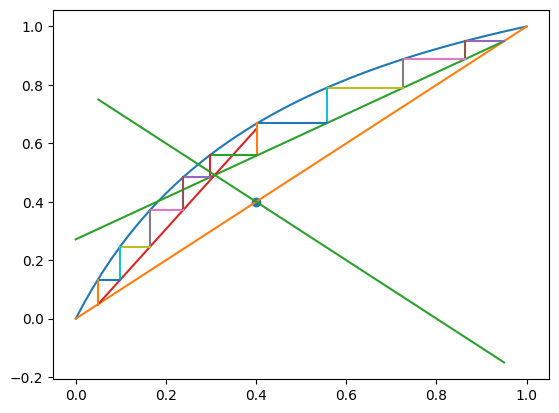

In [40]:
#something wrong
# need material ballace
# answer is 
xn_points, yn_points, rect_points, strip_points, q_points, no_stage = mccabe (alpha=3, xd=0.95, xw=0.05, xf=0.4, F=100, R=2.5, D=38.88, W=61.11, q=0.5)
print(no_stage)
x_eq, y_eq = equilibrium_data(alpha=3)
x_y_plot(x_eq, y_eq, rect_points, strip_points, xn_points, yn_points, q_points, xf=0.4, q=0.5)

In [38]:
#mccabe (alpha=2.5, xd=0.974, xw=0.0235, xf=0.44, F=350, R=3.5, D=153.4, W=196.6, q=0.5)


6
12


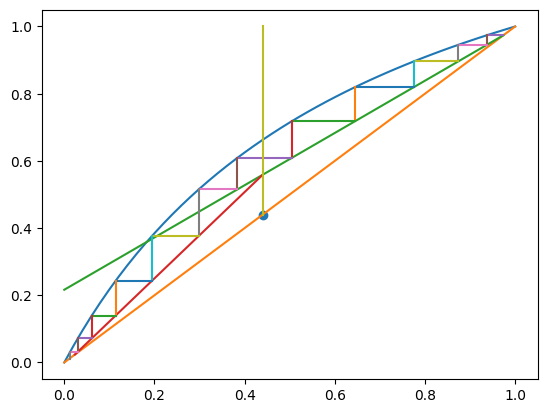

In [39]:
xn_points, yn_points,rect_points, strip_points, q_points, no_stage = mccabe (alpha=2.5, xd=0.974, xw=0.0235, xf=0.44, F=350, R=3.5, D=153.4, W=196.6, q=1)
x_eq, y_eq = equilibrium_data(alpha=2.5)
print(no_stage)
x_y_plot(x_eq, y_eq, rect_points, strip_points, xn_points, yn_points, q_points, xf=0.44, q=1)